## DATA IMPORTATION AND PREPROCESSING


In [41]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [59]:
# loading the dataset into a dataframe
df = pd.read_csv("bank_cleaned.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [43]:
df.shape

(45211, 17)

The dataset has 17 columns and 45211 rows in total

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The dataset has both categorical and numerical columns

In [45]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


The average age of the people within the dataset is 40 years old and the average yearly balance being 1362 Euroes. On average customers were contacted 2 or 3 times during the campaign.

In [46]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

The data doesn't have any missing values. It is totally inclusive. 
Now I proceed to Exploratory Data Analysis.

## EXPLORATORY DATA ANALYSIS.

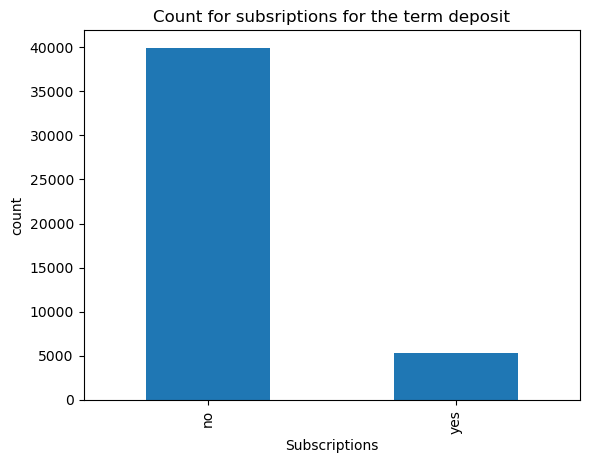

In [47]:
subscriptions = df['y'].value_counts()
# Title and labels
subscriptions.plot(kind = 'bar')
plt.xlabel('Subscriptions')
plt.ylabel('count')
plt.title('Count for subsriptions for the term deposit')
#show the plot
plt.show()


The above plot shows that most people did not subscribe to the term deposit, now we explore further to find out why 

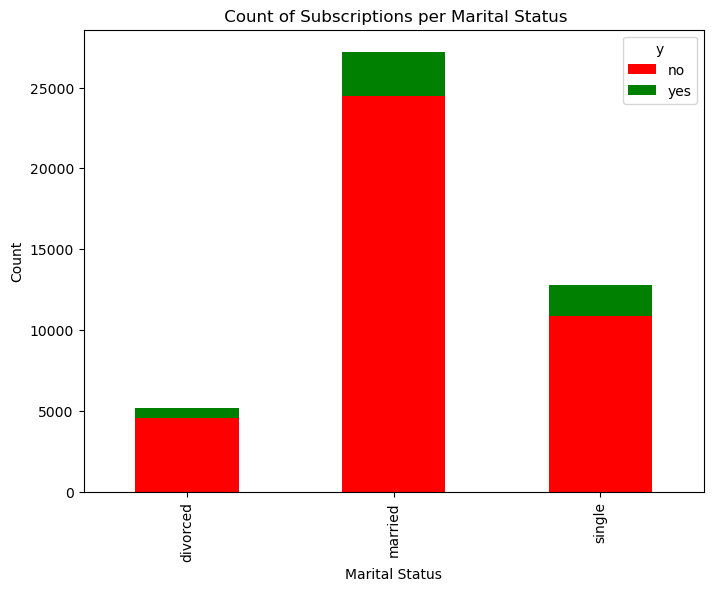

In [48]:
# grouping by marital status and subscriptions
maritalstatus_subscriptions = df.groupby(['marital','y']).size().unstack()
# Plotting the bar plot
maritalstatus_subscriptions.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8,6))
# Title and labels
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title(' Count of Subscriptions per Marital Status')
# showing the plot
plt.show()

According to the above plot, majority of the people within the dataset were married. Most of the people did not subscribe to the term deposit.

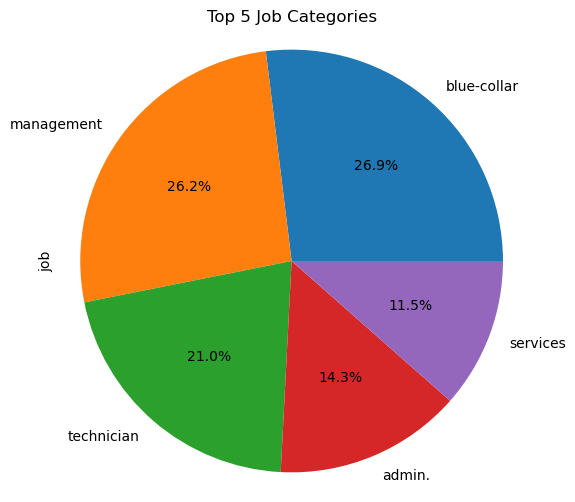

In [49]:
jobs = df['job'].value_counts()

#plot the top five jobs
top_entries = jobs.nlargest(5)
plt.figure(figsize=(6, 6))
top_entries.plot(kind = 'pie', autopct='%1.1f%%')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Show the plot
plt.title('Top 5 Job Categories')
plt.show()


According to the above plot most people within the dataset were blue collar and the least were students and unknown

### MODEL BUILDING AND EVALUATION

In [50]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [52]:
# Identify categorical columns
X = df.drop(columns = ['y'])
y = df['y']

# Identify categorical columns in X
categorical_cols_X = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns in X
X_encoded = pd.get_dummies(X, columns=categorical_cols_X, drop_first=True)

# Encode the target variable y
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Transform y to numerical format

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)


In [53]:
# creating and fitting the decision tree classisfier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
# making predictions
predictions = model.predict(X_test)


In [55]:
# checking the performance of the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8753732168528143


The model seems to be performing well with an accuracy score of 87%. Below I explored further to find out which are the most important features for prediction.


In [56]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])  # Replace with your class names
print(report)

              precision    recall  f1-score   support

     Class 0       0.93      0.93      0.93      7952
     Class 1       0.48      0.50      0.49      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043



                Feature  Importance
3              duration    0.273701
1               balance    0.110243
0                   age    0.092761
40     poutcome_success    0.091333
2                   day    0.088206
5                 pdays    0.039906
4              campaign    0.034486
6              previous    0.018716
24          housing_yes    0.016799
33            month_jun    0.013787
27      contact_unknown    0.013432
34            month_mar    0.013326
35            month_may    0.011285
15       job_technician    0.011187
20  education_secondary    0.010844
37            month_oct    0.010290
18      marital_married    0.009902
10       job_management    0.009103
32            month_jul    0.009095
19       marital_single    0.009073
7       job_blue-collar    0.008980
36            month_nov    0.008399
21   education_tertiary    0.008251
25             loan_yes    0.007973
28            month_aug    0.007970
30            month_feb    0.007939
38            month_sep    0

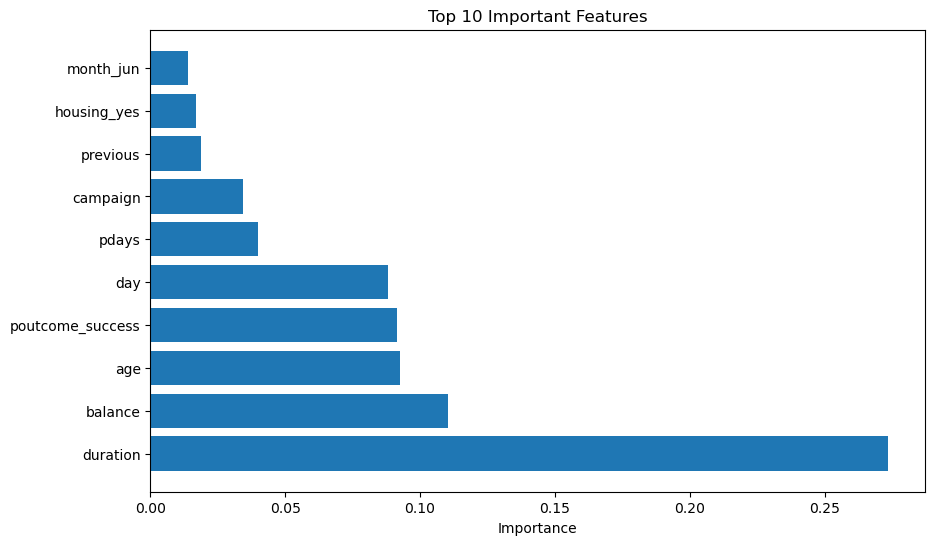

In [57]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print(feature_importance_df)

# Optional: Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Important Features')
plt.show()

The above plot shows the top 10 most important features for the model and duration seems to be the most important feature which is the time taken for the last contact followed by balance which is the average yearly balance, in euros.

In [58]:
# Select top n important features
n = 10  # Change this number as needed
top_features = feature_importance_df['Feature'][:n]

# Create new DataFrame with only the top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Train a new model with the top features
new_model = DecisionTreeClassifier()
new_model.fit(X_train_top, y_train)

# Evaluate the new model
accuracy = new_model.score(X_test_top, y_test)
print(f'Accuracy of new model with top {n} features: {accuracy:.2f}')

Accuracy of new model with top 10 features: 0.85


The model accuracy decreased to 85% after selecting only the top 10 features showing that each feature is important to asses whether a person will subscribe to the term deposit.